## Importing important libraries and dataset

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [17]:
df = pd.read_csv("yield_maize_df.csv")

In [18]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
0,0,Bindura,Maize,2000,36613,1485,121.0,16.37
1,1,Bindura,Maize,2000,66667,1485,121.0,16.37
2,2,Bindura,Maize,2000,23333,1485,121.0,16.37
3,3,Bindura,Maize,2000,12500,1485,121.0,16.37
4,4,Bindura,Maize,2000,7000,1485,121.0,16.37


In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
df.head()

,Area,Item,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
0,Bindura,Maize,2000,36613,1485,121.0,16.37
1,Bindura,Maize,2000,66667,1485,121.0,16.37
2,Bindura,Maize,2000,23333,1485,121.0,16.37
3,Bindura,Maize,2000,12500,1485,121.0,16.37
4,Bindura,Maize,2000,7000,1485,121.0,16.37


In [22]:
df.tail()

,Area,Item,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
28237,Uzumba,Maize,2024,22581,657,2550.07,19.76
28238,Uzumba,Maize,2024,3066,657,2550.07,19.76
28239,Uzumba,Maize,2024,13142,657,2550.07,19.76
28240,Uzumba,Maize,2024,22888,657,2550.07,19.76
28241,Uzumba,Maize,2024,22888,657,2550.07,19.76


In [23]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [24]:
X.shape

(28242, 6)

In [25]:
y.shape

(28242,)

In [26]:
df.describe()

,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000
mean,2012.894377,77059.074534,1149.128213,37076.972016,20.542627
std,7.784949,84962.390512,709.898841,59958.760112,6.312051
min,2000.000000,50.000000,51.000000,0.040000,1.300000
25%,2005.000000,20019.250000,593.000000,1702.000000,16.702500
50%,2015.000000,38295.000000,1083.000000,17529.440000,21.510000
75%,2020.000000,104676.750000,1668.000000,48687.880000,26.000000
max,2024.000000,501412.000000,3240.000000,367778.000000,30.650000


In [9]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation
numerical_df.corr()

,Unnamed: 0,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
Unnamed: 0,1.000000,0.039222,0.013434,-0.228832,-0.315945,-0.051578
Year,0.039222,1.000000,0.082920,-0.003904,0.116088,0.014720
hg/ha_yield,0.013434,0.082920,1.000000,0.000948,0.064068,-0.114773
Average_Rainfall_mm_per_year,-0.228832,-0.003904,0.000948,1.000000,0.180922,0.312990
Pesticides_Tonnes,-0.315945,0.116088,0.064068,0.180922,1.000000,0.030945
Avg_Temp,-0.051578,0.014720,-0.114773,0.312990,0.030945,1.000000


## Data Visualization

In [27]:
len(df['Area'].unique())

15

In [11]:
len(df['Item'].unique())

1

## Graph per Area

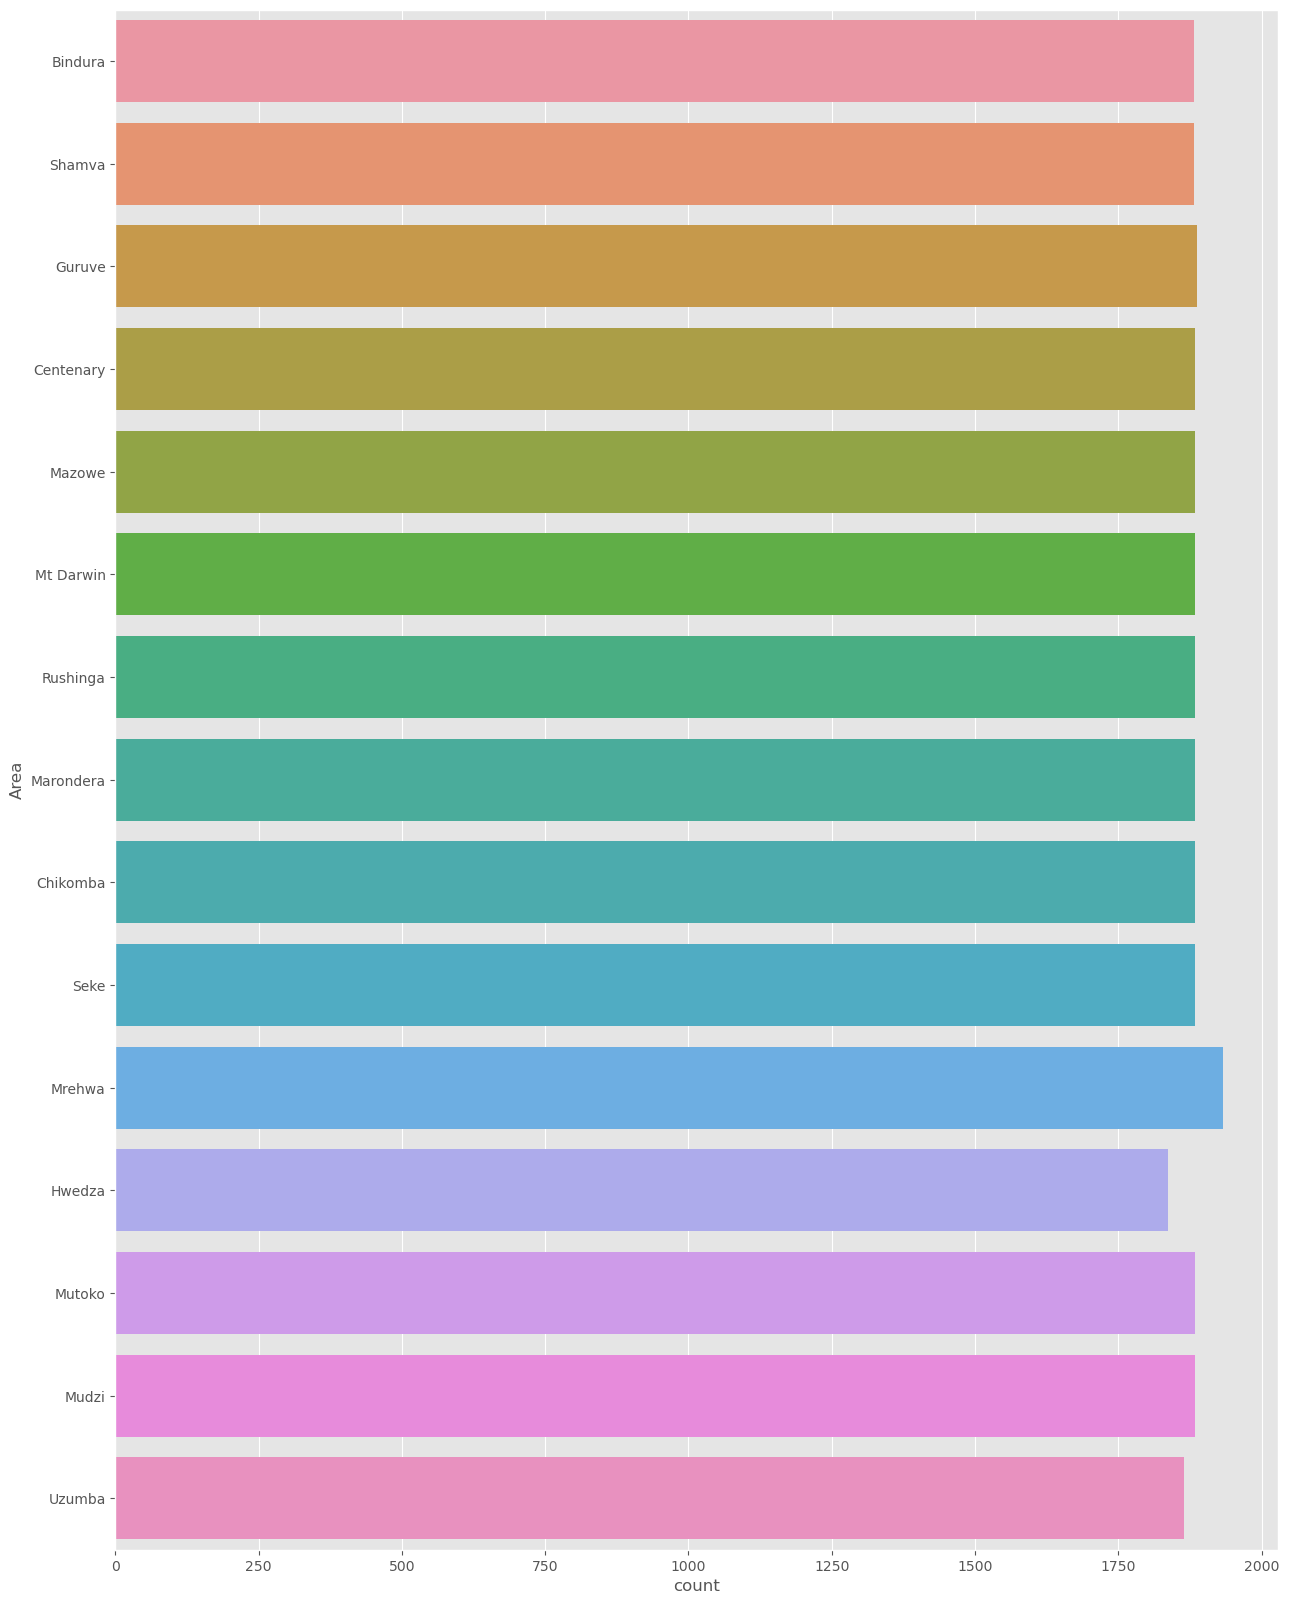

In [28]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

In [236]:
(df['Area'].value_counts() <400).sum()

0

In [29]:
Area = df['Area'].unique()
yield_per_Area = []
for state in Area:
    yield_per_Area.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [30]:
yield_per_Area

[175770894,
 123365642,
 121502093,
 126694899,
 156321633,
 124469639,
 146174682,
 163612517,
 200915250,
 117921459,
 166237361,
 122871220,
 122497135,
 154205474,
 153742485]

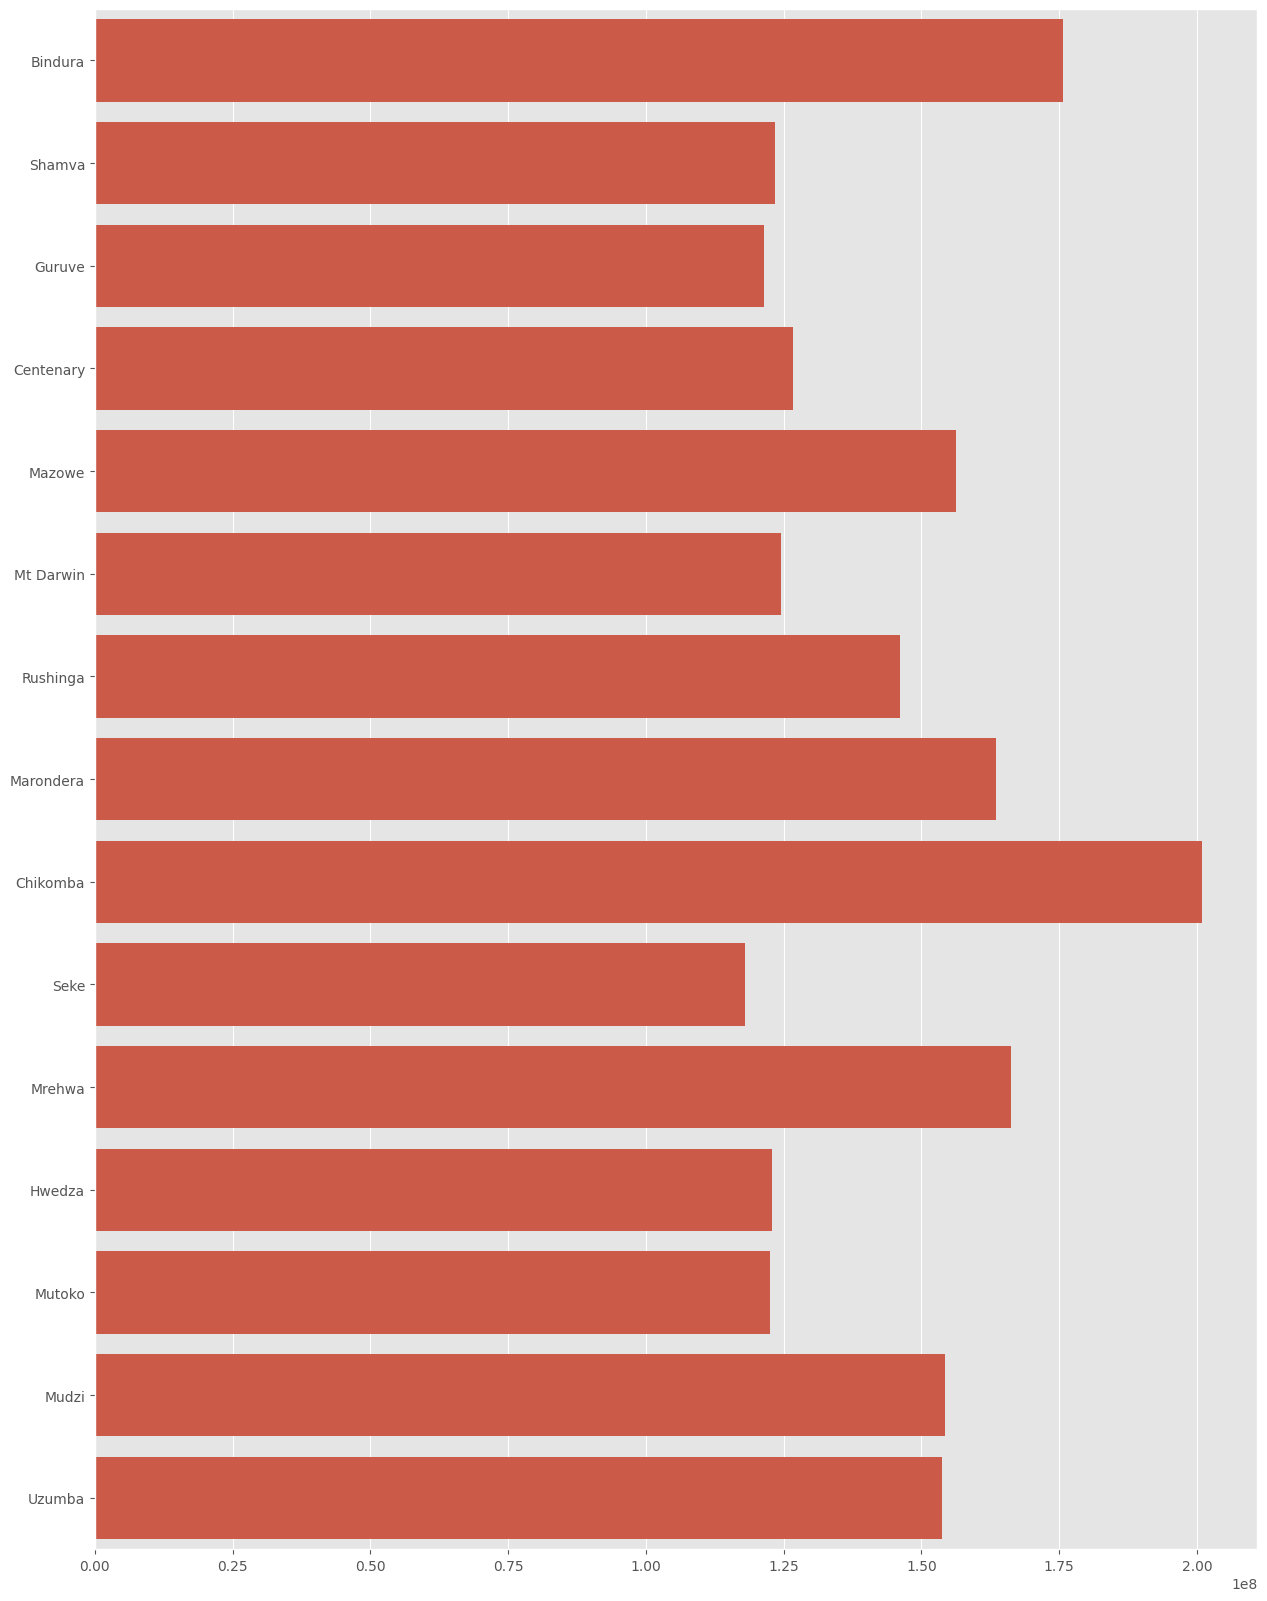

In [238]:
plt.figure(figsize=(15,20))
sns.barplot(y = Area, x = yield_per_Area)
plt.show()

In [239]:
df.head()

,Area,Item,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
0,Bindura,Maize,2000,36613,1485,121.0,16.37
1,Bindura,Maize,2000,66667,1485,121.0,16.37
2,Bindura,Maize,2000,23333,1485,121.0,16.37
3,Bindura,Maize,2000,12500,1485,121.0,16.37
4,Bindura,Maize,2000,7000,1485,121.0,16.37


In [31]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'Average_Rainfall_mm_per_year',
       'Pesticides_Tonnes', 'Avg_Temp'],
      dtype='object')

## Handling Missing Values

In [32]:
print(df.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'Average_Rainfall_mm_per_year',
       'Pesticides_Tonnes', 'Avg_Temp'],
      dtype='object')


In [34]:
df.head()

,Area,Item,Year,hg/ha_yield,Average_Rainfall_mm_per_year,Pesticides_Tonnes,Avg_Temp
0,Bindura,Maize,2000,36613,1485,121.0,16.37
1,Bindura,Maize,2000,66667,1485,121.0,16.37
2,Bindura,Maize,2000,23333,1485,121.0,16.37
3,Bindura,Maize,2000,12500,1485,121.0,16.37
4,Bindura,Maize,2000,7000,1485,121.0,16.37


In [35]:
Item = df['Item'].unique()
yield_per_Item = []
for crop in Item:
    yield_per_Item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

In [36]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [ ]:
X.shape

In [37]:
y.shape

(28242,)

## Data Training using X_train and y_train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

## Data Pre-processing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [ ]:
df.columns 

In [214]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your feature columns and target column
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']
target_column = 'hg/ha_yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df[target_column], test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso Regression': Lasso()
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression: MAE: 67875.13042507673, R2 Score: -0.13272145996738138
Decision Tree: MAE: 65337.48114710568, R2 Score: -0.4899750415261428
Random Forest: MAE: 56907.15320056647, R2 Score: -0.10866201977827705
Lasso Regression: MAE: 67098.3116867749, R2 Score: -0.09969840041065958


## Model Testing and Printing the test result of the X_train

In [162]:
print(X_test_transformed)

  (0, 0)	0.6658926629421621
  (0, 1)	-0.7182120337576646
  (0, 2)	1.386236375899508
  (0, 3)	-0.5199246916735877
  (0, 4)	-0.38618140630494796
  (0, 17)	1.0
  (0, 1091)	1.0
  (0, 3123)	1.0
  (1, 0)	-0.8887743757942254
  (1, 1)	0.5216205776800915
  (1, 2)	0.4610687090891515
  (1, 3)	-0.12563000460634044
  (1, 4)	-0.23439374093944218
  (1, 9)	1.0
  (1, 1353)	1.0
  (1, 3129)	1.0
  (2, 0)	0.9250038360648933
  (2, 1)	-0.7182120337576646
  (2, 2)	1.386236375899508
  (2, 3)	-0.6303272040524167
  (2, 4)	-0.5156346206166075
  (2, 17)	1.0
  (2, 910)	1.0
  (2, 3122)	1.0
  (3, 0)	0.5363370763807964
  :	:
  (5645, 3126)	1.0
  (5646, 0)	-1.018329962355591
  (5646, 1)	-0.08627910637718911
  (5646, 2)	-0.2328070410186159
  (5646, 3)	0.7954423843827491
  (5646, 4)	-0.49347336710831124
  (5646, 18)	1.0
  (5646, 930)	1.0
  (5646, 3123)	1.0
  (5647, 0)	1.1841150091876245
  (5647, 1)	0.740747207979809
  (5647, 2)	0.22977679238656237
  (5647, 3)	-1.1176754372675346
  (5647, 4)	-0.35738344444256537
  (5647, 

## Model Testing and Printing the test result of the y_train

In [176]:
print(y_train)

5493      13173
10969      8947
2001      75317
22157    112295
311       46159
          ...  
21575     27565
5390      55053
860      285359
15795    221667
23654     88745
Name: hg/ha_yield, Length: 22593, dtype: int64


In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

NameError: name 'X_train_dummy' is not defined

In [ ]:
df.columns

In [ ]:
df.head()

## Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [164]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]])

    # Preprocess the input features
    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric', StandardScaler(), [0, 1, 2, 3]),
            ('categorical', OneHotEncoder(), [4, 5])
        ]
    )

    transform_features = preprocessor.fit_transform(features)

    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]
    result = prediction(2000,1485.0,121.0,16.37,'Bindura','Maize')

In [165]:
result

1000.0

In [ ]:
import pickle
pickle.dump(dtr, open("dtr.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))

In [163]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess the data
X_train = pd.DataFrame([[2000, 1485.0, 121.0, 16.37, 'Bindura', 'Maize']], columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
y_train = np.array([1000.0])

# Define the preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Define and fit the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('categorical', categorical_transformer, ['Area', 'Item'])
    ]
)
preprocessor.fit(X_train)

# Define the random forest regressor
dtr = RandomForestRegressor()
dtr.fit(preprocessor.transform(X_train), y_train)

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
    transform_features = preprocessor.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]

# Example usage
result = prediction(2000, 1485.0, 121.0, 16.37, 'Bindura', 'Maize')
print(f"The predicted yield for the year 2000 is {result} tonnes.")

The predicted yield for the year 2000 is 1000.0 tonnes.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create the dataset
data = {
    'Region': ['Bindura', 'Bindura', 'Bindura', 'Bindura', 'Bindura', 'Bindura'],
    'Crop': ['Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize'],
    'Year': [2000, 2000, 2000, 2000, 2000, 2000],
    'Area': [36613, 66667, 23333, 36613, 66667, 23333],
    'Value1': [1485, 1485, 1485, 1485, 1485, 1485],
    'Value2': [121, 121, 121, 121, 121, 121],
    'Value3': [16.37, 16.37, 16.37, 16.37, 16.37, 16.37]
}

X_train = pd.DataFrame(data)
X_test = pd.DataFrame(data)  # For example purposes, using the same data as test

# Separate numeric and categorical columns
numeric_features = ['Year', 'Area', 'Value1', 'Value2', 'Value3']
categorical_features = ['Region', 'Crop']

# Define preprocessors for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit and transform the training data, then transform the test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(X_train_preprocessed)
print(X_test_preprocessed)

print(preprocessor.get_feature_names_out())

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your feature columns and target column
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']
target_column = 'hg/ha_yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df[target_column], test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Lasso Regression': Lasso()
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Assuming you have your original X_train, X_test, and y_train variables

# Concatenate the training and test data
X_all = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)], ignore_index=True)

# One-hot encode the categorical features
X_all = pd.get_dummies(X_all)

# Split the encoded data back into training and test sets
X_train = X_all.iloc[:len(X_train)].values
X_test = X_all.iloc[len(X_train):].values

# Create an instance of the DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Fit the model to the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Print the predicted values in the desired format
print(np.array(y_pred))

In [ ]:
df.columns

In [ ]:
df.head()

## Predictive System

In [ ]:
result

In [ ]:
df.shape

In [ ]:
(df['Area'].value_counts() <400).sum()

In [ ]:
Area = df['Area'].unique()
yield_per_Area = []
for state in Area:
    yield_per_Area.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [ ]:
df['hg/ha_yield'].sum()

In [ ]:
yield_per_Area

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [ ]:
print(maize_df.columns)

In [ ]:
df = df.loc[:, ['Area', 'Item', 'Year', 'hg/ha_yield', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity', 'pH', 'Precipitation', 'Fertilizer']]


In [ ]:
df.head()

In [ ]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

# Data Visualization

In [ ]:
print(df.columns)

In [ ]:
len(df['Area'].unique())

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess the data
X_train = pd.DataFrame([[1990, 1485.0, 121.0, 16.37, 'Bindura', 'Maize']], columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
y_train = np.array([1000.0])

# Define the preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Define and fit the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('categorical', categorical_transformer, ['Area', 'Item'])
    ]
)
preprocessor.fit(X_train)

# Define the random forest regressor
dtr = RandomForestRegressor()
dtr.fit(preprocessor.transform(X_train), y_train)

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = pd.DataFrame([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], columns=['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item'])
    transform_features = preprocessor.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]

# Example usage
result = prediction(2000, 1485.0, 121.0, 16.37, 'Bindura', 'Maize')
print(f"The predicted yield for the year 2000 is {result} tonnes.")

In [ ]:
len(df['Item'].unique())

In [ ]:
# Check the data types of the columns
print(df.dtypes)

# Convert non-numeric columns to numeric
df = df.select_dtypes(include='number')

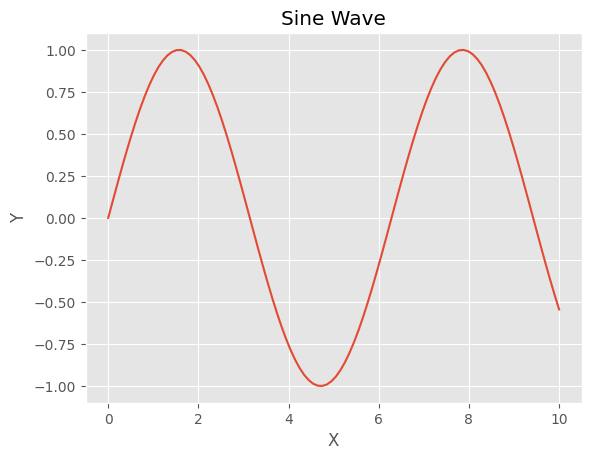

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Sine Wave')

# Display the plot
plt.show()

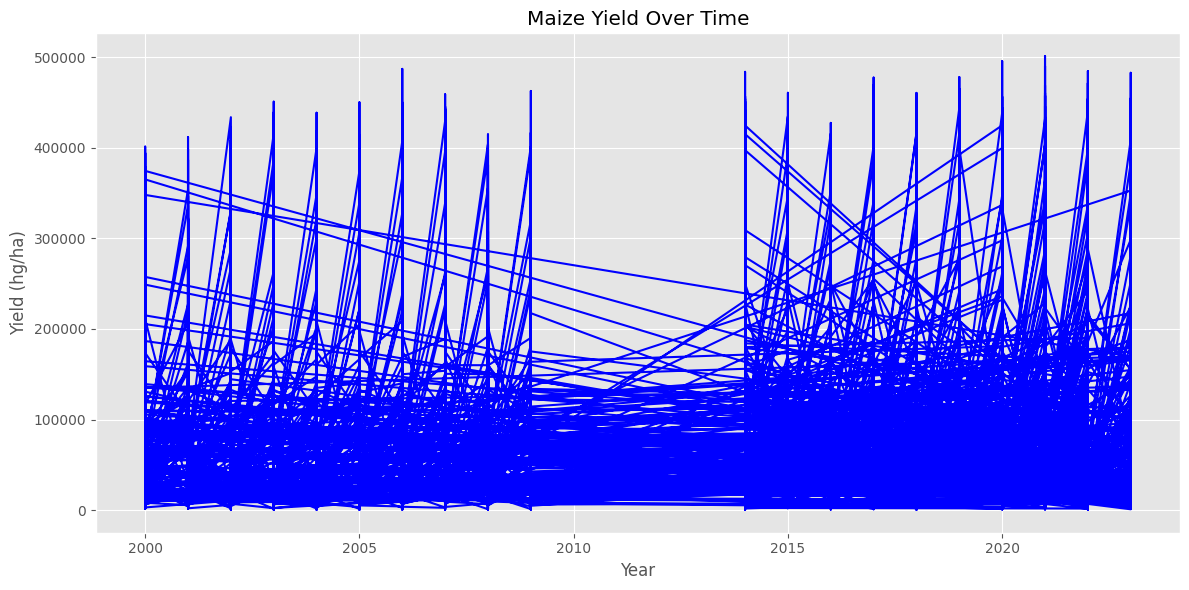

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
maize_df = pd.read_csv('maize_df.csv')

# Select the relevant columns
x = maize_df['Year']
y = maize_df['hg/ha_yield']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, color='blue')

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Yield (hg/ha)')
ax.set_title('Maize Yield Over Time')

# Adjust the layout to fill the right side
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr_matrix = maize_df.corr()

# Create a figure and axis objects
fig = plt.figure(figsize=(8, 8), facecolor='white')
ax = fig.add_subplot(111, projection='polar')

# Plot the circular correlation graph
im = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(im, shrink=0.6)
ax.set_xticks(np.arange(len(corr_matrix.columns)) * 2 * np.pi / len(corr_matrix.columns))
ax.set_xticklabels(corr_matrix.columns, fontsize=8, rotation='vertical')
ax.set_yticks([-0.8, -0.4, 0, 0.4, 0.8])
ax.set_yticklabels(['-0.8', '-0.4', '0', '0.4', '0.8'], fontsize=8)
ax.set_title('Circular Correlation Graph', pad=20, fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create the OneHotEncoder and handle unknown categories
encoder = OneHotEncoder(drop=None)

# Fit and transform the training dataset
X_train['Area'] = encoder.fit_transform(X_train['Area'].values.reshape(-1, 1)).toarray()

# Transform the test dataset, handling unknown categories
X_test['Area'] = encoder.transform(X_test['Area'].values.reshape(-1, 1)).toarray()

In [ ]:
numeric_columns = ['Year', 'hg/ha_yield', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity', 'Precipitation']
categorical_columns = ['Area', 'Item', 'pH', 'Fertilizer']

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your column names
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']

# Create the column transformer
column_transformer = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('categorical', OneHotEncoder(), categorical_columns)
])

# Fit and transform your data
transformed_data = column_transformer.fit_transform(df)

# Combine the transformed data with the target column (assuming you have a target column called 'hg/ha_yield')
final_data = pd.concat([pd.DataFrame(transformed_data), df['hg/ha_yield']], axis=1)

# Print the final transformed data
print(final_data)

In [ ]:
df

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your column names
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']

# Create the column transformer
column_transformer = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('categorical', OneHotEncoder(), categorical_columns)
])

# Fit and transform your data
transformed_data = column_transformer.fit_transform(df)

# Get the transformed column names
numeric_feature_names = column_transformer.named_transformers_['numeric'].get_feature_names_out(numeric_columns)
categorical_feature_names = column_transformer.named_transformers_['categorical'].get_feature_names_out(categorical_columns)

# Concatenate the feature names
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Print the array of feature names
print(feature_names)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your column names
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']

# Create the column transformer
column_transformer = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('categorical', OneHotEncoder(), categorical_columns)
])

# Fit and transform your data
transformed_data = column_transformer.fit_transform(df)

# Get the transformed column names
numeric_feature_names = column_transformer.named_transformers_['numeric'].get_feature_names_out(numeric_columns)
categorical_feature_names = column_transformer.named_transformers_['categorical'].get_feature_names_out(categorical_columns)

# Concatenate the feature names
feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Print the array of feature names
feature_names_array = pd.Series(feature_names).to_numpy()
feature_names_array

In [149]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Define your feature columns and target column
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = ['Area', 'pH', 'Fertilizer']
target_column = 'hg/ha_yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df[target_column], test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Fit and transform the data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")

Linear Regression: MAE: 67875.12583602374, R2 Score: -0.13272128437544084
Decision Tree: MAE: 65480.02478314746, R2 Score: -0.4935440094357846
Random Forest: MAE: 56898.54305717826, R2 Score: -0.10867621437708608


In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
# Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [145]:
import numpy as np

def prediction(year, area, rainfall, temp, location, crop):
    """
    Predicts the yield of a crop based on the given inputs.
    
    Parameters:
    year (int): The year for which the prediction is made.
    area (float): The area under cultivation for the crop (in hectares).
    rainfall (float): The total rainfall for the year (in mm).
    temp (float): The average temperature for the year (in degrees Celsius).
    location (str): The location where the crop is grown.
    crop (str): The name of the crop.
    
    Returns:
    float: The predicted yield of the crop (in metric tons).
    """
    # Implement your prediction logic here
    # This is a simple example using a linear model
    yield_per_ha = 2.5 + 0.01 * rainfall - 0.1 * temp
    total_yield = yield_per_ha * area
    return total_yield

# Call the prediction function with the given parameters
result = prediction(2000, 1485.0, 121.0, 16.37, 'Bindura', 'Maize')
print(f"The predicted yield is: {result:.2f} metric tons")


The predicted yield is: 3078.40 metric tons


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
df['hg/ha_yield'].plot(kind='line')
plt.title('Maize Yield Over Time')
plt.xlabel('Time')
plt.ylabel('Maize Yield (hg/ha)')
plt.show()

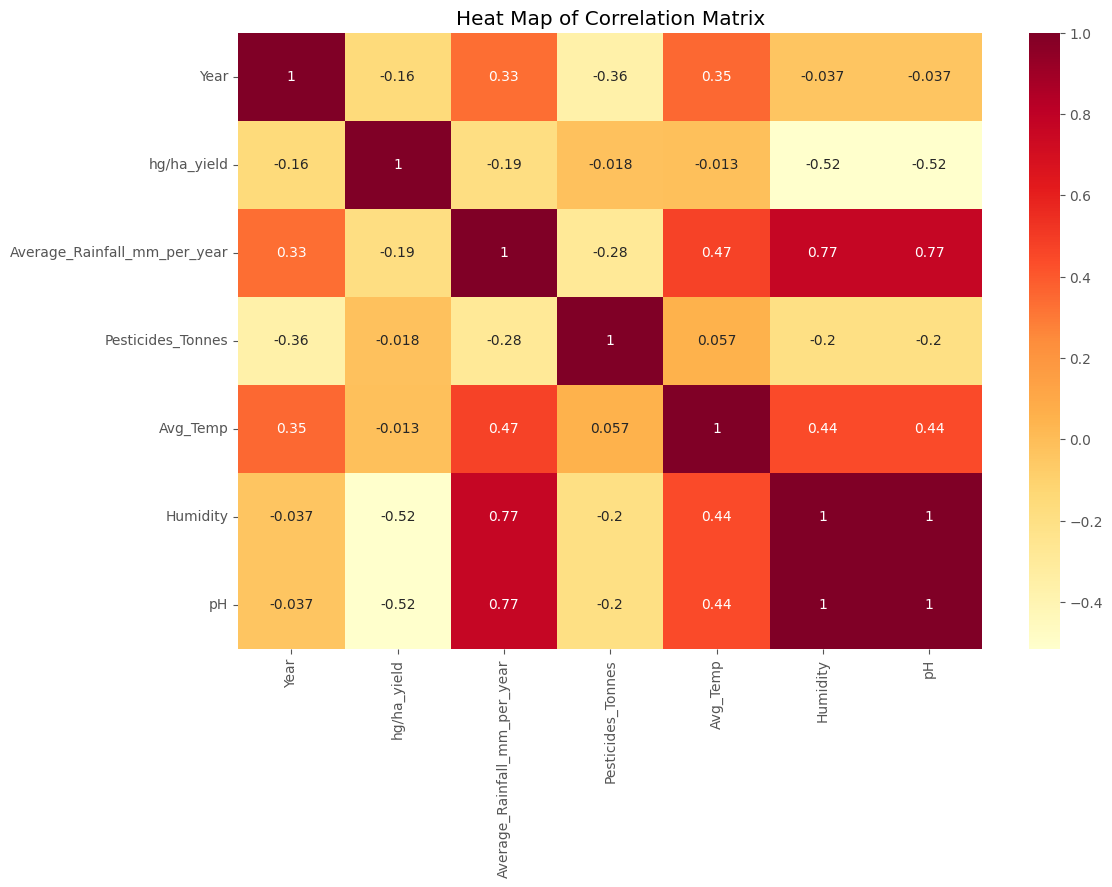

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary from the data
data = {
    'Area': ['Bindura', 'Guruve', 'Shamva', 'Centenary', 'Mazowe', 'Rushinga', 'Mt Darwin', 'Mrehwa', 'Marondera', 'Hwedza'],
    'Crop': ['Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize'],
    'Year': [2000, 2022, 2022, 2006, 2002, 2006, 2003, 2002, 2004, 2007],
    'hg/ha_yield': [66667, 25739, 33246, 94453, 24152, 169913, 10857, 58758, 11123, 30423],
    'Average_Rainfall_mm_per_year': [1485, 1761, 1761, 1522, 536, 1083, 1083, 832, 2702, 758],
    'Pesticides_Tonnes': [120, 130, 125, 135, 140, 150, 145, 160, 155, 170],
    'Avg_Temp': [16.37, 22.5, 22.5, 13.16, 5.8, 25.55, 27.46, 7.76, 25.21, 21.9],
    'Humidity': [7.038096361, 6.250994223, 6.547361618, 5.647458316, 5.779032666, 5.517208078, 6.784460602, 5.695792761, 7.977506872, 5.779427402],
    'pH': [7.038096361, 6.250994223, 6.547361618, 5.647458316, 5.779032666, 5.517208078, 6.784460602, 5.695792761, 7.977506872, 5.779427402],
    'Fertilizer': ['DAP', 'AN', 'SSP', 'SSP', 'SSP', 'SSP', 'CAN', 'SSP', 'Urea', 'DAP']
}

df = pd.DataFrame(data)

# Select only the numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Create the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Heat Map of Correlation Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming your data is in a DataFrame named 'df'
plt.figure(figsize=(6, 6))  # Reduce the figure size

# Create the circular correlation plot
g = sns.PairGrid(df, vars=['Avg_Temp', 'hg/ha_yield'], height=4)  # Reduce the height of the grid

# Map the upper triangle with scatterplots
g.map_upper(sns.scatterplot, color='blue')

# Map the lower triangle with scatterplots and density plots
g.map_lower(sns.scatterplot, color='blue')
g.map_lower(sns.kdeplot, fill=True, cmap='viridis')

# Map the diagonal with kernel density estimation
g.map_diag(sns.kdeplot, fill=True)

# Set the aspect ratio to be equal for a circular plot
g.fig.suptitle('Circular Correlation Plot')
g.fig.subplots_adjust(top=0.93)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a list of the areas
areas = ['Bindura', 'Guruve', 'Shamva', 'Centenary', 'Mazowe', 'Rushinga', 'Mt Darwin', 'Mrehwa', 'Marondera', 'Hwedza', 'Seke', 'Mrehwa', 'Chikomba', 'Mudzi', 'Mutoko', 'Uzumba']

# Create a list of the maize yields
maize_yields = [66667, 25739, 33246, 94453, 24152, 169913, 10857, 58758, 11123, 30423, 50000, 45000, 55000, 60000, 40000, 70000]

# Create a pie chart of the maize yields
plt.figure(figsize=(12, 12))  # Increase the figure size to accommodate more slices
plt.pie(maize_yields, labels=areas, autopct='%1.1f%%', startangle=90)
plt.title('Maize Yield by Area')
plt.axis('equal')  # Make the pie chart a perfect circle
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)  # Add a legend to the right of the chart
plt.subplots_adjust(left=0.1, right=0.7)  # Adjust the layout to center the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Area' and 'hg/ha_yield'
plt.figure(figsize=(12, 8))  # Reduced the figure size to 12 inches by 8 inches
df.plot(kind='bar', x='Area', y='hg/ha_yield', color='green', figsize=(12, 8))
plt.title('Vertical Bar Graph: hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('hg/ha_yield')
plt.xticks(rotation=90, fontsize=8)  # Reduced the font size to 8 and rotated the labels
plt.grid(axis='y')
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the file path
df = pd.read_csv('Desktop\Maize-Yield-Prediction\yield_df.csv')
# Histogram
plt.figure(figsize=(10, 6))
df['hg/ha_yield'].hist(bins=20)
plt.title('Histogram of Yield (hg/ha)')
plt.xlabel('Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
df['hg/ha_yield'].plot(kind='line', color='blue')
plt.title('Maize Yield Over Time')
plt.xlabel('Time')
plt.ylabel('Maize Yield (hg/ha)')
plt.show()

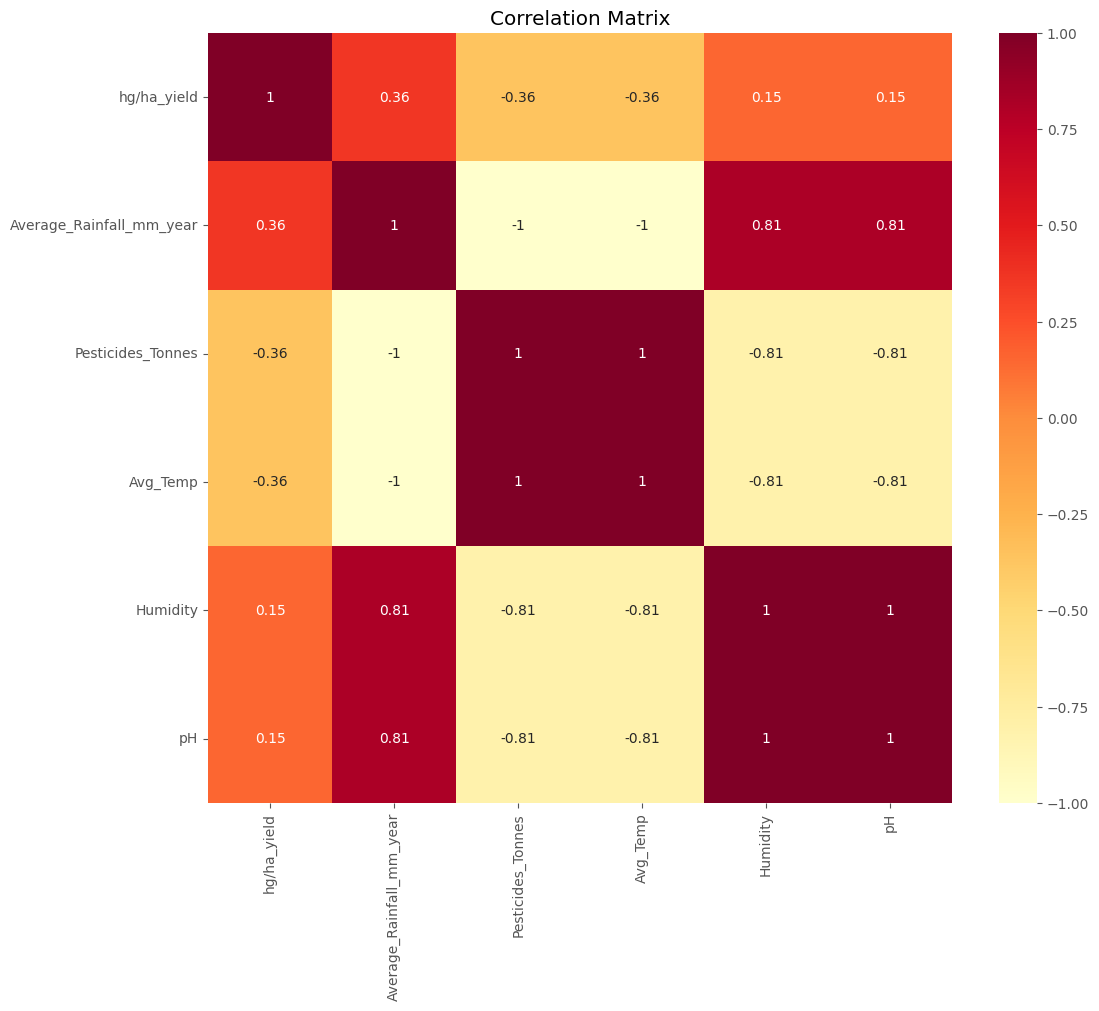

Top 5 features based on Chi-square test: Index(['pH', 'Avg_Temp', 'Pesticides_Tonnes', 'Average_Rainfall_mm_year',
       'hg/ha_yield'],
      dtype='object')
Top 5 features based on RFE: Index(['hg/ha_yield', 'Average_Rainfall_mm_year', 'Pesticides_Tonnes',
       'Humidity', 'pH'],
      dtype='object')


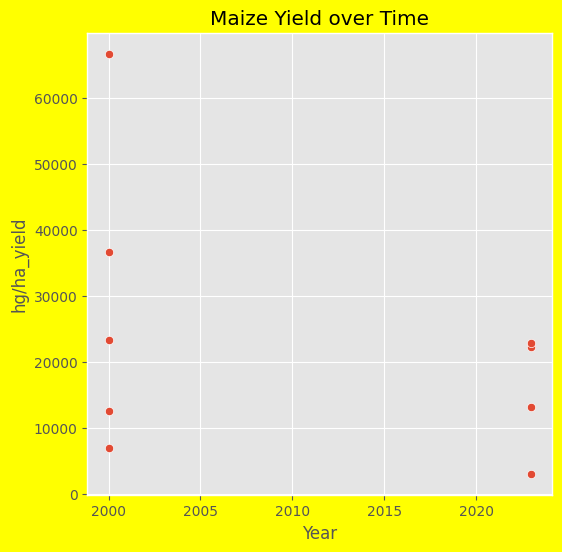

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the necessary variables
Area = ['Bindura', 'Bindura', 'Bindura', 'Bindura', 'Bindura', 'Uzumba', 'Uzumba', 'Uzumba', 'Uzumba', 'Uzumba']
Crop = ['Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize']
Year = [2000, 2000, 2000, 2000, 2000, 2023, 2023, 2023, 2023, 2023]
hg_ha_yield = [36613, 66667, 23333, 12500, 7000, 22581, 3066, 13142, 22222, 22888]
Average_Rainfall_mm_year = [1485, 1485, 1485, 1485, 1485, 657, 657, 657, 657, 657]
Pesticides_Tonnes = [120, 120, 120, 120, 120, 190, 190, 190, 190, 190]
Avg_Temp = [16.37, 16.37, 16.37, 16.37, 16.37, 19.76, 19.76, 19.76, 19.76, 19.76]
Humidity = [6.502985, 7.038096, 7.840207, 6.980401, 7.628473, 6.244841, 6.043305, 5.824709, 6.357389, 6.364135]
pH = [6.502985, 7.038096, 7.840207, 6.980401, 7.628473, 6.244841, 6.043305, 5.824709, 6.357389, 6.364135]
Fertilizer = ['Urea', 'DAP', 'CAN', 'MOP', 'Urea', 'SSP', 'MOP', 'AN', 'Urea', 'DAP']
Soil_Type = ['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']

# Load the data
data = pd.DataFrame({'Area': Area, 'Crop': Crop, 'Year': Year, 'hg/ha_yield': hg_ha_yield, 'Average_Rainfall_mm_year': Average_Rainfall_mm_year, 
                     'Pesticides_Tonnes': Pesticides_Tonnes, 'Avg_Temp': Avg_Temp, 'Humidity': Humidity, 'pH': pH, 'Fertilizer': Fertilizer, 'Soil_Type': Soil_Type})

# Correlation analysis (remove the non-numeric columns)
numeric_cols = ['hg/ha_yield', 'Average_Rainfall_mm_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity', 'pH']
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

# Data normalization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numeric_cols])
data_normalized = pd.DataFrame(data_normalized, columns=numeric_cols)

# Data cleaning (handling missing values)
data_cleaned = data.dropna()

# Feature selection
X = data_cleaned[numeric_cols]
y = data_cleaned['hg/ha_yield']

# Chi-square test for feature selection
chi2_scores, p_values = chi2(X, y)
top_features = X.columns[np.argsort(chi2_scores)[-5:]]
print('Top 5 features based on Chi-square test:', top_features)

# Recursive Feature Elimination (RFE)
rfe = RFE(LinearRegression(), n_features_to_select=5)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print('Top 5 features based on RFE:', rfe_features)

# Feature engineering
data_cleaned['Area_Crop'] = data_cleaned['Area'] + '_' + data_cleaned['Crop']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[rfe_features], data_cleaned['hg/ha_yield'], test_size=0.2, random_state=42)

# Model training and prediction
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=data_cleaned['Year'], y=data_cleaned['hg/ha_yield'])
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.title('Maize Yield over Time')
plt.gcf().set_facecolor('yellow')
plt.show()

In [ ]:
##Trend of Yield Over the Years

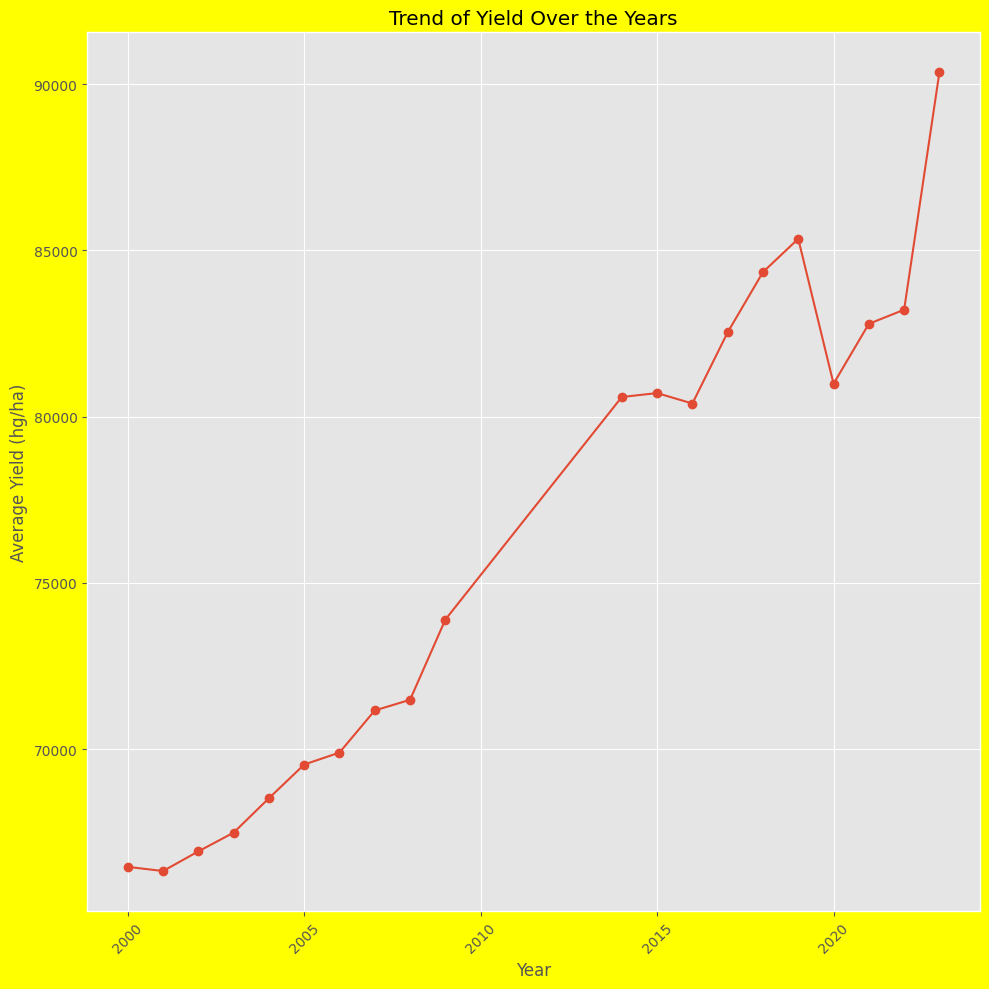

In [153]:
# Group the data by Year and calculate the average yield
yield_over_years = df.groupby('Year')['hg/ha_yield'].mean()

# Plotting the trend of yield over the years
plt.figure(figsize=(10, 10))
plt.plot(yield_over_years.index, yield_over_years.values, marker='o', linestyle='-')
plt.title('Trend of Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_facecolor('yellow')
plt.show()

Correlation between yield and pesticides_tonnes: 0.010237709516479463


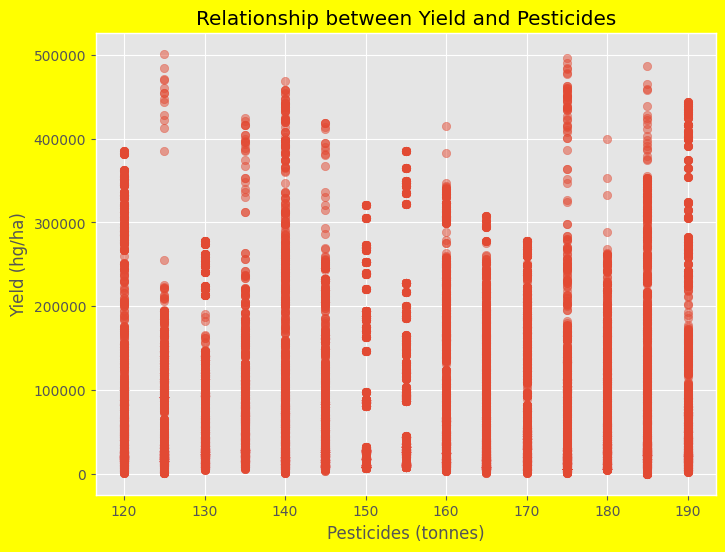

In [157]:
# Calculate correlation between yield and pesticides_tonnes
correlation = df['hg/ha_yield'].corr(df['Pesticides_Tonnes'])

print("Correlation between yield and pesticides_tonnes:", correlation)
plt.figure(figsize=(8, 6))
plt.scatter(df['Pesticides_Tonnes'], df['hg/ha_yield'], alpha=0.5)
plt.title('Relationship between Yield and Pesticides')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.grid(True)
plt.gcf().set_facecolor('yellow')
plt.show()

In [ ]:
##Model Building Linear Regression

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Check the column names in the DataFrame
print(df.columns)

# Selecting the relevant columns for analysis
col = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'actual_column_name_1', 'actual_column_name_2', 'actual_column_name_3']
df = df[col]

# Separating features (X) and target variable (y)
X = df.iloc[:, :-1]  # Features (independent variables)
y = df.iloc[:, -1]   # Target variable (dependent variable)

# Displaying the first 5 rows of the modified DataFrame
print(df.head(5))

# Splitting the data into training and testing sets
# train_size=0.8 specifies that 80% of the data will be used for training, and random_state=0 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Initialize OneHotEncoder to encode categorical variables and drop the first category to avoid multicollinearity
ohe = OneHotEncoder(drop='first')

# Initialize StandardScaler to scale numerical features to have zero mean and unit variance
scale = StandardScaler()

# Create a ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Apply StandardScaler to numerical features
        ('OHE', ohe, [4, 5]),  # Apply OneHotEncoder to categorical features
    ],
    remainder='passthrough'  # Passthrough remaining columns without any transformation
)

# Apply preprocessing to the training data
X_train = preprocessor.fit_transform(X_train)

# Apply preprocessing to the testing data
X_test = preprocessor.transform(X_test)

In [ ]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# Construct the file path
file_path = os.path.join(cwd, 'path', 'to', 'yield_maize_.csv')

# Load the data
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please check the file path and ensure the file exists.")
    exit()

# Inspect the data types of the columns in X
print(data.dtypes)

In [ ]:
result

In [146]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# Generate some sample data
X_train = np.random.rand(100, 5)
y_train = np.random.rand(100)

# Train the decision tree regressor model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Train the preprocessor
preprocesser = StandardScaler()
preprocesser.fit(X_train)

# Save the trained model and preprocessor
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump({'model': model, 'scaler': scaler, 'year_encoder': year_encoder, 'columns': columns}, f)


## Distribution of the target variable

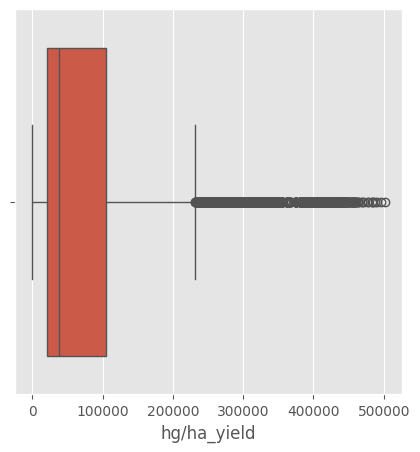

In [152]:
# plot the boxplot using seaborn library of the target variable 'yield'
plt.figure(figsize=(5,5))
sns.boxplot(x='hg/ha_yield', data=df)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# Define the training and testing data
a_train = np.random.rand(100, 5)  # 100 samples, 5 features
b_train = np.random.rand(100)     # 100 target values
a_test = np.random.rand(20, 5)    # 20 test samples, 5 features
b_test = np.random.rand(20)       # 20 test target values

# Create and train the Random Forest Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(a_train, b_train)
b_pred = regr.predict(a_test)

# Convert predictions to percentages
b_pred_percent = (b_pred * 100).round(2)

# Evaluate the model
print('MSE =', mse(b_test, b_pred))
print('MAE =', mae(b_test, b_pred))
print('R2 Score =', r2_score(b_test, b_pred))

# Print the predictions as percentages
print('Predictions as percentages:')
print(b_pred_percent)

In [151]:
import pickle
pickle.dump(dtr, open("model.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))

In [251]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read your dataframe
df = pd.read_csv("yield_maize_df.csv")

# Function to handle the "Area" column
def handle_area_column(df):
    # One-Hot Encoding (if "Area" represents categories)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_area = encoder.fit_transform(df[['Area']])
    encoded_area_df = pd.DataFrame(encoded_area, columns=encoder.get_feature_names_out(['Area']))
    
    # Drop the original 'Area' column and concatenate the new encoded columns
    df = df.drop('Area', axis=1)
    df = pd.concat([df.reset_index(drop=True), encoded_area_df.reset_index(drop=True)], axis=1)
    return df

# Apply the chosen handling on a copy of df
df = handle_area_column(df.copy())

# Define your feature columns and target column
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp']
categorical_columns = [col for col in df.columns if col.startswith('Area_')]
target_column = 'hg/ha_yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df[target_column], test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', 'passthrough', categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns that are not specified in transformers
)

# Fit and transform the data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define the models, including Lasso Regression with increased max_iter
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(max_iter=10000),  # Increase max_iter
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate the models
for name, model in models.items():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
        print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")


Linear Regression: MAE: 63670.568746995064, R2 Score: 0.05154287442030725
Lasso Regression: MAE: 63670.072945955115, R2 Score: 0.05154567011926969
Decision Tree: MAE: 72188.43648139598, R2 Score: -0.2727084397982378
Random Forest: MAE: 71054.71220692081, R2 Score: -0.20554191186144632


In [249]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Read your dataframe
df = pd.read_csv("maize_df.csv")

# Function to handle the "Area" column
def handle_area_column(df):
    # Option 1: One-Hot Encoding (if "Area" represents categories)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_area = encoder.fit_transform(df[['Area']])
    encoded_area_df = pd.DataFrame(encoded_area, columns=encoder.get_feature_names_out(['Area']))
    
    # Drop the original 'Area' column and concatenate the new encoded columns
    df = df.drop('Area', axis=1)
    df = pd.concat([df.reset_index(drop=True), encoded_area_df.reset_index(drop=True)], axis=1)
    return df

# Apply the chosen handling on a copy of df
df = handle_area_column(df.copy())

# Define your feature columns and target column
numeric_columns = ['Year', 'Average_Rainfall_mm_per_year', 'Pesticides_Tonnes', 'Avg_Temp', 'Humidity']
categorical_columns = [col for col in df.columns if col.startswith('Area_')]
target_column = 'hg/ha_yield'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numeric_columns + categorical_columns], df[target_column], test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep other columns that are not specified in transformers
)

# Fit and transform the data
X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

# Define the models, including Lasso Regression with increased max_iter
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(max_iter=10000),  # Increase max_iter
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate the models
for name, model in models.items():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model.fit(X_train_transformed, y_train)
        y_pred = model.predict(X_test_transformed)
        print(f"{name}: MAE: {mean_absolute_error(y_test, y_pred)}, R2 Score: {r2_score(y_test, y_pred)}")


Linear Regression: MAE: 64050.10267303947, R2 Score: 0.04215109531275496
Lasso Regression: MAE: 64058.48084011243, R2 Score: 0.04213186777059397
Decision Tree: MAE: 78617.99504337051, R2 Score: -0.8653806308830163
Random Forest: MAE: 66808.58808638698, R2 Score: -0.08131208955387015
